# Module 3: Functional Programming III
Course: Advanced Programming for CSAI (Spring 2024)

Topics covered in this module:
- Iterables, Iterators and Generators. 
- Lazy Computation. 
- Real-world examples of Functional Programming.

You are advised to work on this notebook after, or in parallel to, consulting other materials of the module, such as the slide deck and book chapters. The notebook contains examples and exercises that should help you understand and apply the concepts introduced in the rest of materials. You may also use the official Python docs: https://docs.python.org/3/.

Do not hesitate to be creative when trying out the examples: you can play with the code. You can try variants of the examples and exercises, print values of the variables to understand what is going on at every step, and come up with different solutions to the same exercise and think about relative advantages of each one.

The notebook also contains formative assignments. These are indicated as FA-n, where n is a number id. As explained on the course guide, you have to submit these. Please submit your best effort (*i.e.*, FA-n questions with no answer will be considered incomplete), and **if your solution does not work or you think it is inadequate, add a comment explaining why you could not proceed further**.

To submit the formative assignments, we ask you to upload the filled-in notebook. The notebook you upload should contain *at least* the formative assigments. It's not a problem if you upload the notebook with additional code, like the variants and tests mentioned above. However, to grade your assignments, we will only look at the answers to the requested exercises (those indicated with FA-n), so **make sure you store your answers in the corresponding variables and/or to name your functions as indicated**.

Optional exercises are, as the name indicates, not mandatory for the formative assignments. These are exercises that suggest you to create an alternative approach, or which propose a longer problem that allows for the integration of earlier concepts in one solution; in general, they present scenarios where you can be more creative. To make the most of the course, it is best to try them out and share your solutions on the Discussion Board, so that your peers can comment on them. You are also encouraged to comment on the exercises of your fellow students. This will help you sharpen your evaluation skills, which is a great asset in programming, as in turn this will help you devise more robust, efficient and maintainable solutions. 


### /!\ Before submitting your notebook

Please check it can be ran without errors! You can check this by pressing kernel --> restart and run all before submitting. If it does not run without errors, it is your **responsibility** to fix the problem either by resolving the bug in your code or by commenting it out along with a comment.

---

## Iterables, Iterators and Generators

As you know from the Knowledge Clips, iterable objects (such as, for example, lists) are containers of other objects (such as, for example, integers). Iterables always have an __iter__ method, which returns an iterator for the iterable.

In [1]:
#Lists are iterable objects:
myList = ['blue', 'red', 'yellow']

#We can use for..in.. expressions to iterate, or individually access, each contained objects in the list:
for color in myList:
    print(color)

#Behind the curtains, for... in is calling iter(myList). 
#iter(myList) will call myList.__iter__()

#What should these calls return? (uncomment to find the answer)
#print(iter(myList))
#print(myList.__iter__())
    


blue
red
yellow


Let's see other iterable datatypes:

In [2]:
#Dictionaries are iterable:
myDict = {'blue':'#000099', 'red':'#ff0000', 'yellow':'#ffff00'}

for color in myDict: #we access only the labels when iterating like this
    print(color)
print('\n') #newline
    
for label, value in myDict.items(): #we need to call the method items() to iterate over keys and values
    print("key:", label, ", value:", value)
print('\n') #newline



#Strings are also iterable:
myString='En un lugar de la Mancha...'

for letter in myString:
    print(letter, end=' ') #print space instead of newline at the end 
print('\n') #newline


#And so are sets:
mySet=set((5,4,3,2,1))

#Note that items are not accessed necessarily in insertion order!:
for item in mySet:
    print(item, end=', ') 
print('\n') #newline


blue
red
yellow


key: blue , value: #000099
key: red , value: #ff0000
key: yellow , value: #ffff00


E n   u n   l u g a r   d e   l a   M a n c h a . . . 

1, 2, 3, 4, 5, 



Let's check which of these types have an __iter__ method:

In [3]:
#All iterables have an __iter__ method:
#we can check the methods of an object with dir
#Can you predict which of these will be True?

print("Integer:","__iter__"               in dir(1))
print("List:", "__iter__"                 in dir(myList))
print("Dict:","__iter__"                  in dir(myDict))
print("String:","__iter__"                in dir(myString))
print("1-character string:","__iter__"    in dir('a'))
print("Tuple:","__iter__"                 in dir((3,2,1)))
print("List Comprehension:","__iter__"    in dir([x+1 for x in [1,2,3]]))
print("Generator Expression:","__iter__"  in dir((x+1 for x in [1,2,3])))


#Let's also check some functions:
print("Lambda function:","__iter__"  in dir(lambda x:x))

def times5(n):
    return n*5

print("Function with return:","__iter__"  in  dir(times5))


def times5_gen():
    start = 1
    yield start*5
    start+=1
    

print("Function with yield:","__iter__"  in  dir(times5_gen())) 


Integer: False
List: True
Dict: True
String: True
1-character string: True
Tuple: True
List Comprehension: True
Generator Expression: True
Lambda function: False
Function with return: False
Function with yield: True


Recall that iterables are collections of items, while iterators are not collections: they are objects that store a state (normally, an index). When looping over an iterable, the iterator of that iterable will tell us which item of the collection is the next to be read.

For example, imagine you have a list with 10 strings. Your list is an iterable, and therefore it has an __iter__ method. We can print the contents of the list without using the __iter__ method; however, if we want to loop over the list (for example with a **for** loop), then Python will implicitly call the __iter__ method to obtain an interator for the list. The iterator will keep track of which item should be read next by the **for** loop.  Therefore, the iterator will have a state, and a __next__ method that will inform the **for** loop of which item in the list should be read in the current iteration.



### FA-1:



Which of the types above should also have a ``__ next __`` method? Why?

You are welcome to check your answer empirically (i.e. adapting the code above), but you are not required to do so. 

In [4]:
###### FA-1 #####################################

fa_1_answer = """
Your answer goes here
"""

#################################################

As we know, iter(x) returns an iterator for an iterable x. We can check which additional methods the iterator of x provides (compared to x). We'll do this for myList:

In [5]:
#First we obtain an iterator for myList:
myIterator=iter(myList)
print(type(myIterator))
print(type(myList))

# We can retrieve the methods of each of these objects
# (dir returns a list: we convert it to a set so that we can perform set operations later)
methods_myIterator=set(dir(myIterator))
methods_myList=set(dir(myList))
print('')

# Now we can see which methods are in myIterator but not in myList
print("Methods in the iterator which are not in the iterable:")
print(methods_myIterator- methods_myList) 
print('')
#Note that the iterator has __next__ !

# We can also check which methods are in myList but not myIterator:
print("Methods in the iterable which are not in the iterator:")
print(methods_myList - methods_myIterator)



<class 'list_iterator'>
<class 'list'>

Methods in the iterator which are not in the iterable:
{'__length_hint__', '__next__', '__setstate__'}

Methods in the iterable which are not in the iterator:
{'append', 'reverse', 'clear', 'remove', 'index', '__add__', '__rmul__', 'pop', '__setitem__', '__reversed__', 'sort', '__mul__', '__getitem__', 'insert', 'copy', 'count', '__class_getitem__', '__len__', '__imul__', '__iadd__', '__contains__', '__delitem__', 'extend'}


Note that the iterator provides us with the __ next __  method, which was not available in the iterable!

Note also that the __ iter __ method is not listed above: this is a method that is common both to iterables and iterators (in the case of an iterator, __ iter __ returns self: this is just a language design feature that makes the implementation simpler behind the curtains).


### FA-2: 

If you look at the methods listed above, you can see that the the iterable has a method __ len __ . This is the method called when we do len(myList) to obtain the number of elements in the list. Note that this method is not available in the iterator: you can further verify that len(myIterator) raises a TypeError.

Now look at the example below. The function **firstn** is a generator, as it uses **yield**. As you can see, the generator has an __ iter __ method, and also a __ next __ method. Given what you have seen above, and what you know of generators, try to deduce whether *g* should have a __ len __ method. (You can check your answer empirically using **hasattr**, but it would really help your study to try to deduce this beforehand: this would let you see if you understand what generators are). Provide an explanation of your answer.  

In [6]:
#This function is a generator:
def firstn(n):
    num = 0
    while num < n:
        yield num
        num += 1

g=firstn(4)
print("Generator object:", g)
print("iter in generator:", hasattr(g, '__iter__'))
print("next in generator:", hasattr(g, '__next__'))

###### FA-2 #####################################

fa2_answer = """
Your answer goes here
"""

##################################################

Generator object: <generator object firstn at 0x7f1e2c0df0b0>
iter in generator: True
next in generator: True


### FA-3: 

Imagine you are using a function from a third-party library that returns a generator. You want to write a program that produces a visualization of the elements of this generator, but you want to know beforehand how many elements you can obtain from the generator, as this will help you decide how to create distribute this elements on the screen. How can you do this? (you do not need to submit any code, just reflect on the question).

In [7]:
###### FA-3 #####################################

fa_3_answer = """
Your answer goes here
"""

##################################################

----
## Lazy evaluation


When working on the previous section, you should have noticed some differences in the behavior of generators, compared to other iterables such as lists and dictionaries. This has to do with the fact that generators are lazy. 

If you have not done so yet, this would be a good moment to watch the Knowledge Clip about Lazy Evaluation. 

To test your understanding of the concept of Lazy Evaluation, look at the following examples, and predict what the outcome should be with eager and with lazy evaluation. In particular, think which of these statements should print the word "right", in two theoretical cases: when using a programming language with eager evaluation, and when using a programming language with lazy evaluation. 

When you run the examples, note that Python uses lazy evaluation for Boolean expressions with **and** and **or**. 

In [8]:
True and (print("right") is None)

right


True

In [9]:
False and (print("right") is None)

#print(print("right"))

False

In [10]:
True or (print("right") is None)

True

In [11]:
False or (print("right") is None)

right


True

As you know, generators are also lazy in Python: they don't create all the results immediately, but delay their evaluation until the moment they are needed. This applies both to generator expressions and generator functions with *yield*. 


In [12]:
#The numbers generator defined below has an infinite loop (while True)!
def numbers(): 
    i=0
    while True:     
        yield i 
        i+=1
               

#However, we can call this function without running into an infinite loop!
g=numbers()
#This is thanks to lazy evaluation: the numbers of this generator are only computed when needed.

#We can get the next number as many times as we want 
print(next(g))
print(next(g))
print(next(g))

for _ in range(5):
    print(next(g))

    
print('')


#But don't do the following! (unless you add a break condition)
#for number in g:
#    print(number)
#Since there is no stopping condition, this loop would run infinitely 
#(and you'd have to stop it on time and possibly restart the kernel, and perhaps even your computer)

#The itertools module provides a generator with the same functionality as numbers:
import itertools 

g=itertools.count()
print(next(g))
print(next(g))
print(next(g))


0
1
2
3
4
5
6
7

0
1
2


Here is an example that uses the numbers generator. Note that it uses a break condition!

In [13]:
def sum_to(n):
    sum = 0
    for i in numbers():
        if i == n: 
            break
        sum += i
    return sum

print("Result: ", sum_to(5))
print("Result: ", sum_to(15))
print("Result: ", sum_to(30))


Result:  10
Result:  105
Result:  435


### FA-4

Generators and list comprehensions look very similar, but list comprehensions are eager while generators are lazy.      


Have a look at the following example. We have some *data* stored in a list, and a function that always accesses it in insertion order, up to a certain position (included), and returns the last accessed element.

What are the relative advantatges of using this function with *l* or *g*? Think what would happen in case of much larger data.

In [14]:
data = [2,53, 1, 6674, 23, 16435, 95, 220, 32, 27, 3, 96, 261, 2856]

l = [x for x in data if x % 2 == 0]

g = (x for x in data if x % 2 == 0)

print(l)
print(g)


def access_in_order(it, until, verbose=False):
    for i, element in enumerate(it):
        if verbose:
            print("Accessing element ", i, ": ", element)
        if i >= until:
            return element
    
    
print(access_in_order(l, 2, True))
print(access_in_order(g, 2, True))   
print(access_in_order(g, 2, True))   #Note that we get a different result now! 
                                     #since g is a generator, it keeps the state
g = (x for x in data if x % 2 == 0)  #We need to create it again if we want to regenerate it
print(access_in_order(g, 2, True))

###### FA-4 #####################################

fa_4_answer = """
Your answer goes here
"""

##################################################

[2, 6674, 220, 32, 96, 2856]
<generator object <genexpr> at 0x7f1e2c0df040>
Accessing element  0 :  2
Accessing element  1 :  6674
Accessing element  2 :  220
220
Accessing element  0 :  2
Accessing element  1 :  6674
Accessing element  2 :  220
220
Accessing element  0 :  32
Accessing element  1 :  96
Accessing element  2 :  2856
2856
Accessing element  0 :  2
Accessing element  1 :  6674
Accessing element  2 :  220
220


### FA-5

Now write a function _random_access_ that only accesses an element in one given position in *data*, converts it to a string, and returns it. Would you prefer to use *l* or *g* in this case? Think about the efficiency of each option.

In [15]:
###### FA-5 #####################################

def random_access():
    pass

##################################################

random_position=2
print(random_access(l, random_position)) #=>220
g = (x for x in data if x % 2 == 0) #re-generate the exhausted generator
print(random_access(g, random_position)) #=>220

TypeError: random_access() takes 0 positional arguments but 2 were given

----
# Real-word example 1: Fibonacci numbers

First, familiarize yourself with these functions, which will be useful later.


In [16]:
import itertools


#Take
def take(n, iterable):
    "Return first n items of an iterable as a list"
    return list(itertools.islice(iterable, n))

#Example of use: take the first 5 elements of a generator
print(take(5, itertools.count(start=20)))


#Iterate
def iterate(f, x):
    "..." 
    return itertools.accumulate(itertools.repeat(x), lambda fx, _: f(fx))

g=iterate(lambda x:x+2, 10)
  
print(g)

# Note: don't visualize the content of g with print(list(g))! 
# Can you anticipate what would happen if you did this?

print(next(g))
print(next(g))
print(next(g))

[20, 21, 22, 23, 24]
10
12
14



### FA-6

What does iterate do?

Hint: you can have a look at the itertool functions at the official docs: https://docs.python.org/3/library/itertools.html

In [17]:

###### FA-6 #####################################

fa_6_answer = """
Your answer goes here
"""

##################################################

Now we can look at two implementations of Fibonacci numbers.

### FA-7:

Read the two implementation below. Before running them, can you predict which one will be faster? Was your intuition correct? Explain what makes one faster than the other.

In [18]:
#Implementation 1

def fib(n):
    if n == 0:
        return 1
    
    if n == 1:
        return 1
    
    return fib(n-1) + fib(n-2)

def fibs(n):
    return [fib(i) for i in range(n)]
    

%time fibs(30)

CPU times: user 538 ms, sys: 0 ns, total: 538 ms
Wall time: 1.06 s


[1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229,
 832040]

In [19]:
#Implementation 2

def next_fib(pair):
    x, y = pair
    return (y, x + y)

def fibs():
    return (y for x, y in iterate(next_fib, (0, 1)))

%time take(30, fibs())

CPU times: user 21 µs, sys: 0 ns, total: 21 µs
Wall time: 23.6 µs


[1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229,
 832040]

In [20]:
###### FA-7 #####################################

fa_7_answer = """
Your answer goes here
"""

##################################################

----
## Real-world example 2: K-means Clustering

Now we will look at a fully-fledged real-world application of functional programming: the implementation of the K-means algorithm. We will see an object-oriented and a functional approach. Read the code, try to understand it and play around with it, if you wish. Most importantly: compare the presented approaches, and reflect on their differences.

Basic idea of K-means:
* we have some points
* we want to group them into k clusters
* we want clusters to be "small"

Iterative approach:
* choose k means
* assign each point to cluster of "closest" mean
* compute new means
* repeat

In [21]:
#!pip install numpy
import numpy as np
import random
from functools import reduce
from functools import partial
from operator import add

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

First an object-oriented implementation: 

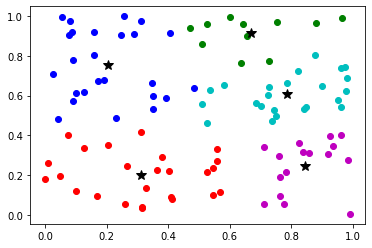

In [22]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.means = [None for _ in range(k)]
        
    def predict(self, point):
        """return index of closest mean"""
        d_min = float('inf')
        for j, m in enumerate(self.means):
            d = sum((m_i - p_i)**2 for m_i, p_i in zip(m, point))
            if d < d_min:
                prediction = j
                d_min = d            
        return prediction


    def fit(self, points, num_iters=10):
        """find the k means"""
        assignments = [None for _ in points]
        self.means = random.sample(list(points), self.k)
        for _ in range(num_iters):
            # assign each point to its closest mean
            for i, point in enumerate(points):
                assignments[i] = self.predict(point)
            # compute new means
            for j in range(self.k):
                cluster = [p for p, c in zip(points, assignments) if c == j]
                self.means[j] = list(map(lambda x: x / len(cluster), reduce(partial(map, add), cluster)))
            assignments = [self.predict(point) for point in points]
            self.plot_current(points, assignments)
                
    def plot_current(self, points, assignments):
        clear_output(wait=True)
        for j, color in zip(range(5), ['r', 'g', 'b', 'm', 'c']):
            cluster = [p for p, c in zip(points, assignments) if j == c]
            xs, ys = zip(*cluster)
            plt.scatter(xs, ys, color=color)
        # now plot the means and the clusters
        for x, y in self.means:
            plt.plot(x, y, marker='*', markersize=10, color='black')
        plt.show()        
        plt.pause(1)
            
# 100 random points, 5 clusters
k=5
points = np.random.random((100,2))
model = KMeans(k)
model.fit(points)

Now the functional alternative:

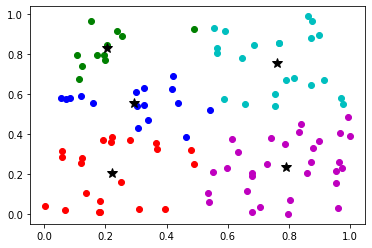

In [23]:
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline


def k_means(points, k, num_iters=10):
    means = random.sample(list(points), k)
    for _ in range(num_iters):
        means = new_means(points, means)
        assignments = [closest_index(point, means) for point in points]
        plot_current(points, assignments, means)
    return means

def new_means(points, old_means):
    k = len(old_means)
    assignments = [closest_index(point, old_means) for point in points]
    clusters = [[point for point, c in zip(points, assignments) if c == j] for j in range(k)]
    return [cluster_mean(cluster) for cluster in clusters]

def closest_index(point, means):
    distances = [squared_distance(point, mean) for mean in means]
    return min(enumerate(distances), key=lambda pair: pair[1])[0]

def squared_distance(p, q):
    return sum((p_i - q_i)**2 for p_i, q_i in zip(p, q))

def cluster_mean(points):
    num_points = len(points)
    dim = len(points[0]) if points else 0
    
    sum_points = [sum(point[j] for point in points) for j in range(dim)]
    return [s / num_points for s in sum_points]

def plot_current(points, assignments, means):
    clear_output(wait=True)
    for j, color in zip(range(5), ['r', 'g', 'b', 'm', 'c']):
        cluster = [p for p, c in zip(points, assignments) if j == c]
        xs, ys = zip(*cluster)
        plt.scatter(xs, ys, color=color)
    # now plot the means and the clusters
    for x, y in means:
        plt.plot(x, y, marker='*', markersize=10, color='black')
    plt.show()        
    plt.pause(1)


k = 5
points = np.random.random((100,2))
means = k_means(points, k)

We can actually push the functional approach more, as shown below.

With the k\_meanses function, we can more easily iterate until convergence. 

In particular, the iterate function in k\_meanses produces the series x, f(x), f(f(x)), ....
so this results in the (lazy, infinite) sequence:
* initial_means
* new_means(points, initial_means)
* new_means(points, new_means(points, initial_means))
* ...

In [24]:
from itertools import islice
from itertools import accumulate
from itertools import repeat
from functools import partial

#We have seen these functions; let's repeat them here:
def take(n, it):
    return [x for x in islice(it, n)]

def iterate(f, x):
    return accumulate(repeat(x), lambda fx, _: f(fx))


def k_meanses(points, k):
    """returns an infinite sequence of meanses"""
    initial_means = random.sample(list(points), k)
    initial_means = list(map(lambda x: list(x), initial_means))
    # Note: partial(new_means, points) is the function that takes us from prev_means to next_means
    return iterate(partial(new_means, points), initial_means)

# Now, we can actually check for very long iterations (from the sequence generated in k_meanses ...)
# For example, 10 iterations
k=5
meanses = take(10, k_meanses(points, k))

#print(list(meanses))

With these functions, we can easily iterate until convergence:

In [25]:
def until_convergence(it):
    return accumulate(it, no_repeat)

def no_repeat(prev, curr):
    print(prev)
    print(curr)
    if prev == curr: 
        raise StopIteration
    else:
        return curr


meanses = until_convergence(k_meanses(points, 5))

n_iterations=len(list(meanses))
print("Number of iterations required for convergence: ", n_iterations)

[[0.8730900993244606, 0.6472244516049447], [0.32626337090137625, 0.5441035015936303], [0.8344733520974608, 0.40951890546140757], [0.06697731998574852, 0.019097715136552562], [0.4379363613998346, 0.5572892318134448]]
[[0.8164726349818979, 0.7740125318201349], [0.2147251266169016, 0.6093776242194979], [0.7882732669833727, 0.24562746495866133], [0.1587808570281894, 0.12228558584749848], [0.5128272406749852, 0.6123514033444744]]
[[0.8164726349818979, 0.7740125318201349], [0.2147251266169016, 0.6093776242194979], [0.7882732669833727, 0.24562746495866133], [0.1587808570281894, 0.12228558584749848], [0.5128272406749852, 0.6123514033444744]]
[[0.7985561566762419, 0.7696619115931953], [0.20842325669962863, 0.630788055140806], [0.7796663655869734, 0.23633106276061666], [0.17674320950213926, 0.15154713942825176], [0.5111926737819267, 0.6162766192783812]]
[[0.7985561566762419, 0.7696619115931953], [0.20842325669962863, 0.630788055140806], [0.7796663655869734, 0.23633106276061666], [0.1767432095021

The output should be equivalent in both approaches. 

### FA-8:

Reflect on these two implementations. What are their advantages and disadvantadges? Which one do you (subjectively) like most? Can you think of other machine learning algorithms or artificial intelligence applications for which a functional approach could be a better/worse approach? (There is not a clear right or wrong answer to this question, it is just meant to stimulate your thinking and reflect on what you have learnt about Functional Programming in the last three modules).

In [26]:
###### FA-8 #####################################

fa_8_answer = """
Your answer goes here
"""

##################################################

# References

* K-means code adapted from Martin Atzmueller's AdvancedProgramming/AP-Lecture7-More-Functional-Examples.ipynb (2020).